# Problem Statement

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

sns.set()
sns.set_style('darkgrid')


pd.options.display.max_columns = None
pd.options.display.max_rows = 50
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 2000

In [2]:
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_auc_score
import pickle

import pandas as pd
from sklearn.model_selection import GridSearchCV

In [3]:
# Import various models to try

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
import os

# Load and explore the data in a dataframe 

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

Time    V1    V2   V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14   V15   V16   V17   V18   V19   V20   V21   V22   V23   V24   V25   V26   V27   V28  Amount  Class
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  0.09 -0.55 -0.62 -0.99 -0.31  1.47 -0.47  0.21  0.03  0.40  0.25 -0.02  0.28 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26 -0.17  1.61  1.07  0.49 -0.14  0.64  0.46 -0.11 -0.18 -0.15 -0.07 -0.23 -0.64  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  0.21  0.62  0.07  0.72 -0.17  2.35 -2.89  1.11 -0.12 -2.26  0.52  0.25  0.77  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39 -0.05 -0.23  0.18  0.51 -0.29 -0.63 -1.06 -0.68  1.97 -1.23 -0.21 -0.11  0.01 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  0.75 -0.82  0.54  1.35 -1.12  0.18 -0.45 -0.24 -0.04  0.80  0.41 -0.01  0.80 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0

In [5]:
df.shape

(284807, 31)

In [6]:
df.describe()

Time        V1        V2        V3        V4        V5        V6        V7        V8        V9       V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21       V22       V23       V24       V25       V26       V27       V28    Amount     Class
count 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00 284807.00
mean   94813.86      0.00      0.00     -0.00      0.00      0.00      0.00     -0.00      0.00     -0.00      0.00      0.00     -0.00      0.00      0.00      0.00      0.00     -0.00      0.00      0.00      0.00      0.00     -0.00      0.00      0.00      0.00      0.00     -0.00     -0.00     88.35      0.00
std    47488.15      1.96      1.65      1.52      1.42      1.38      1.33      1.24      1.19      1.10      1.09      1.02      1.00      1.00      0.96      0.92      0.88      0.85      0.84      0.81      0.77      0.73      0.73      0.62      0.61      0.52      0.48      0.40      0.33    250.12      0.04
min        0.00    -56.41    -72.72    -48.33     -5.68   -113.74    -26.16    -43.56    -73.22    -13.43    -24.59     -4.80    -18.68     -5.79    -19.21     -4.50    -14.13    -25.16     -9.50     -7.21    -54.50    -34.83    -10.93    -44.81     -2.84    -10.30     -2.60    -22.57    -15.43      0.00      0.00
25%    54201.50     -0.92     -0.60     -0.89     -0.85     -0.69     -0.77     -0.55     -0.21     -0.64     -0.54     -0.76     -0.41     -0.65     -0.43     -0.58     -0.47     -0.48     -0.50     -0.46     -0.21     -0.23     -0.54     -0.16     -0.35     -0.32     -0.33     -0.07     -0.05      5.60      0.00
50%    84692.00      0.02      0.07      0.18     -0.02     -0.05     -0.27      0.04      0.02     -0.05     -0.09     -0.03      0.14     -0.01      0.05      0.05      0.07     -0.07     -0.00      0.00     -0.06     -0.03      0.01     -0.01      0.04      0.02     -0.05      0.00      0.01     22.00      0.00
75%   139320.50      1.32      0.80      1.03      0.74      0.61      0.40      0.57      0.33      0.60      0.45      0.74      0.62      0.66      0.49      0.65      0.52      0.40      0.50      0.46      0.13      0.19      0.53      0.15      0.44      0.35      0.24      0.09      0.08     77.16      0.00
max   172792.00      2.45     22.06      9.38     16.88     34.80     73.30    120.59     20.01     15.59     23.75     12.02      7.85      7.13     10.53      8.88     17.32      9.25      5.04      5.59     39.42     27.20     10.50     22.53      4.58      7.52      3.52     31.61     33.85  25691.16      1.00

In [7]:
#print all columns & identify null or non null values
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# there are no null columns in the data
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis 

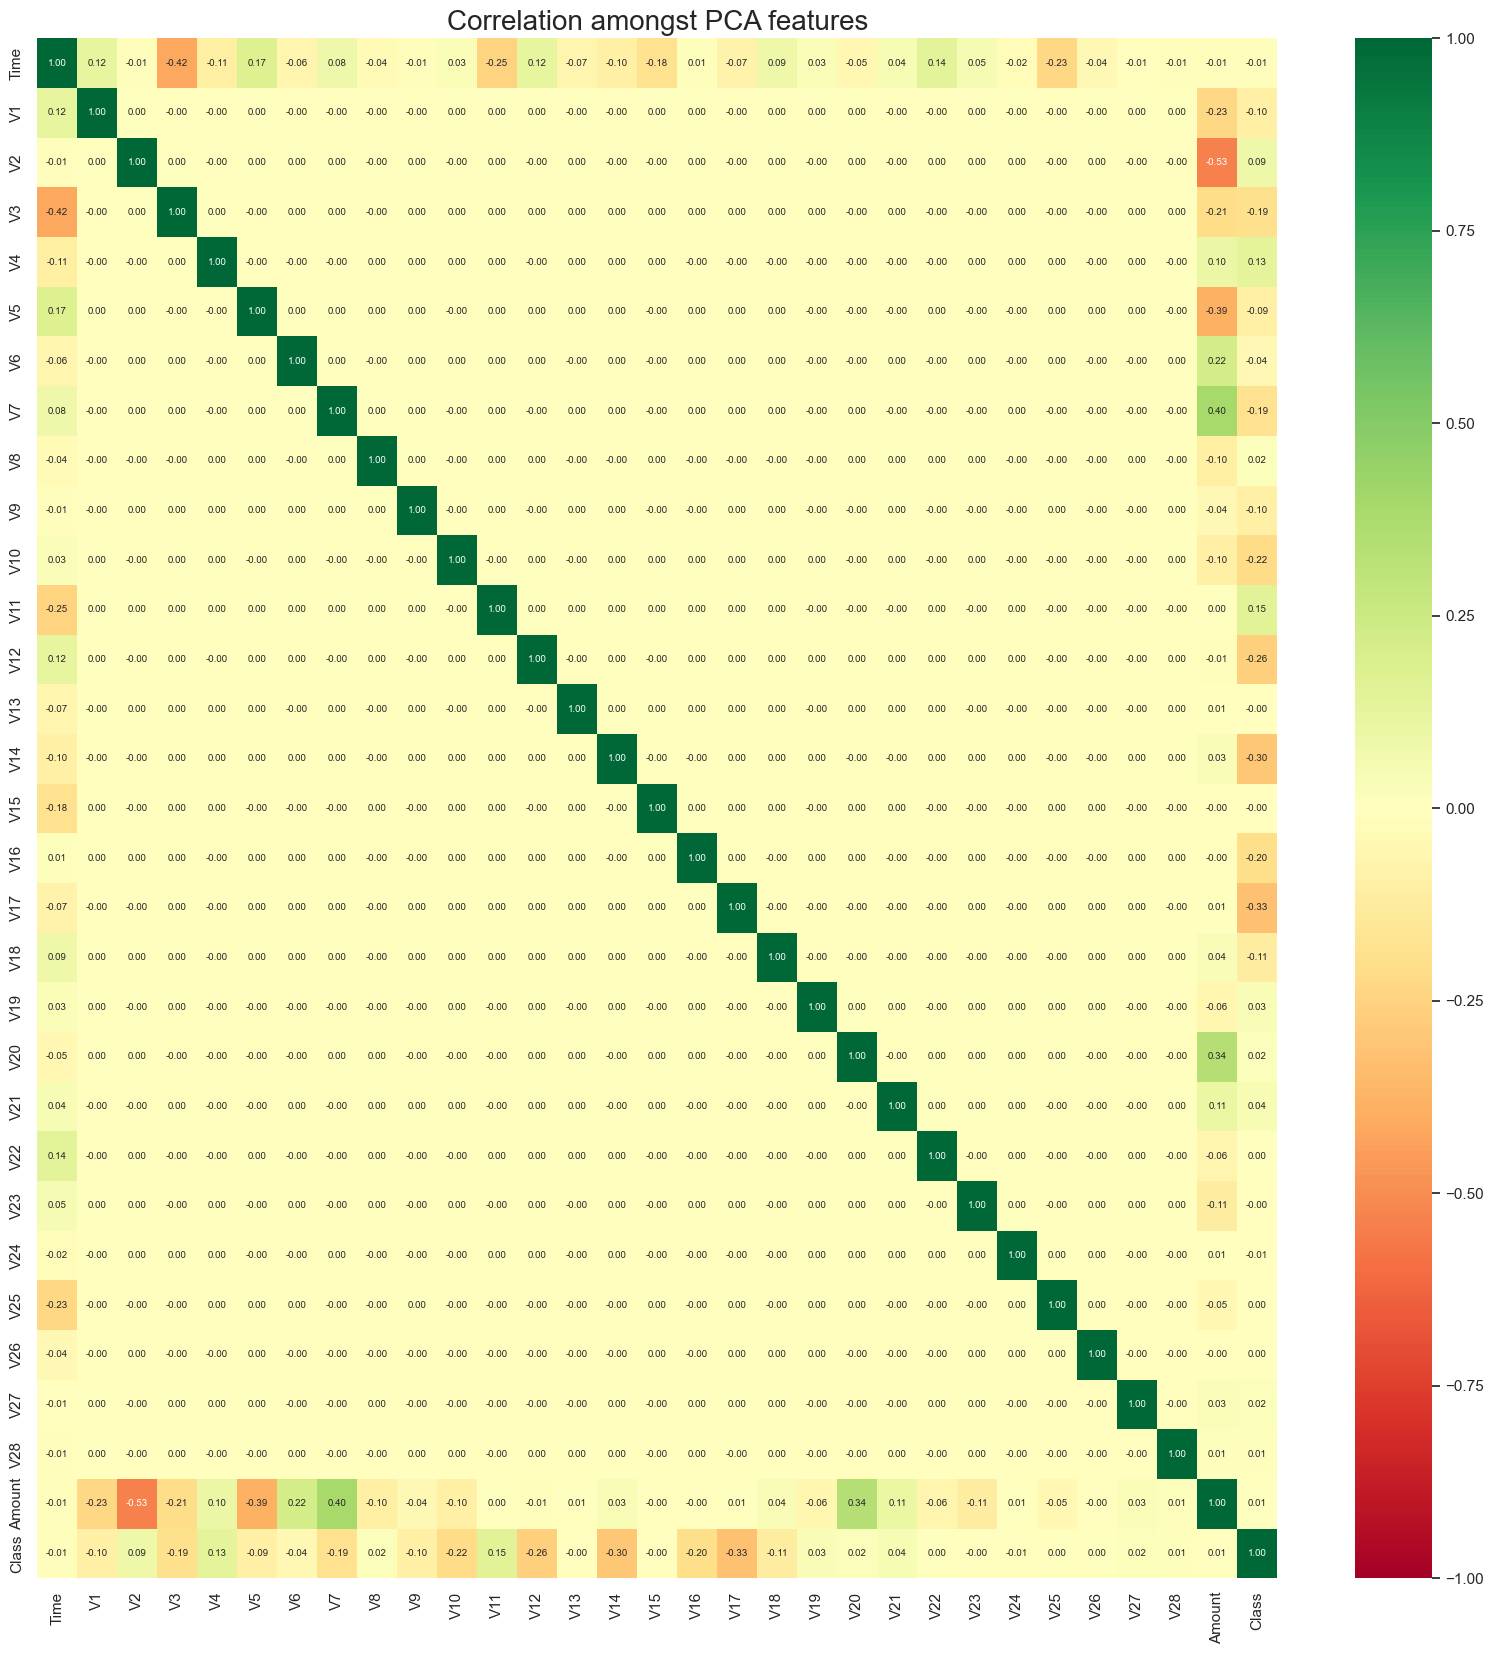

In [9]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, fmt=".2f", annot_kws={"fontsize":7}) 
plt.title('Correlation amongst PCA features', fontsize=20) 
plt.show()

<li> Corelation plot shows there is no strong corelation but some co-relation exists

####  Class Imbalance - Class Distribution
<li> Given that chances of fraud happening is relatively very small and hence the Class Imbalance problem exists.
<li> Identify such corelation using the Pie Charts. Graph shows that there just 0.2 % fruad in the over all data set 
<li> Class Imbalance Data set needs to be handled differently i.e. oversampling / undersampling technique etc 

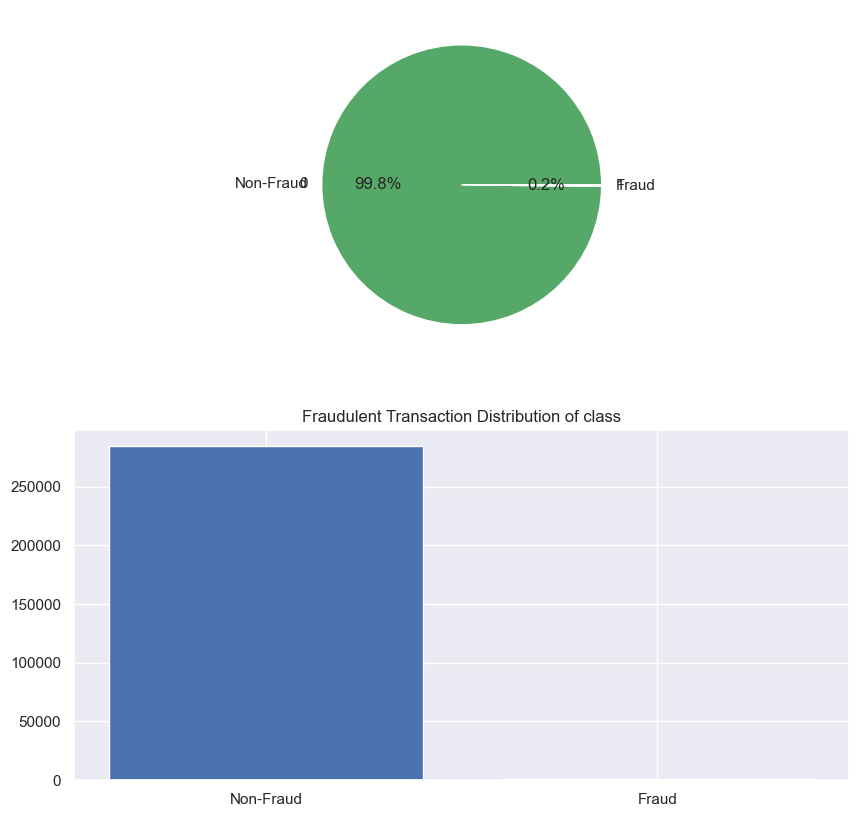

In [10]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10, 10))

#Draw a pie plot in the 0 axes and bar plot in second axes 
plt.subplot(2, 1, 1)
# draw pie chart showing % of the Class
plt.pie(df.groupby(by="Class").count()["Time"] / len(df), autopct='%1.1f%%', labels=["Non-Fraud", "Fraud"])

plt.pie(df.groupby(by="Class").count()["Time"], labels=df.groupby(by="Class").count()["Time"].index)
plt.subplot(2, 1, 2)
plt.bar(df.groupby(by="Class").count()["Time"].index, df.groupby(by="Class").count()["Time"])
#show label to the bar graph 
plt.xticks(np.arange(2), ['Non-Fraud', 'Fraud'])
plt.title("Fraudulent Transaction Distribution of class")



plt.show()

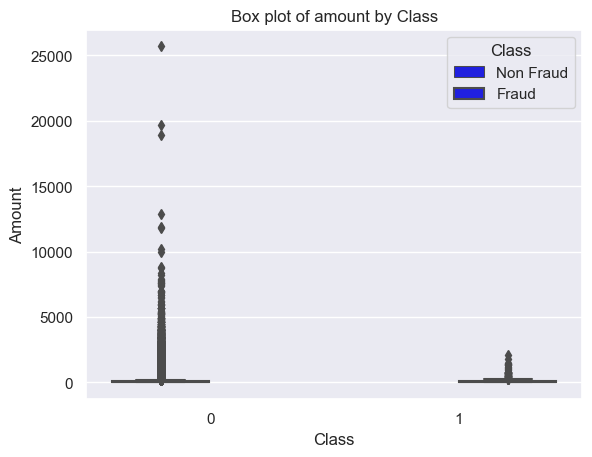

In [11]:
# Create a box plot for the Amount and give it by Class
sns.boxplot( data=df, x='Class', y='Amount', hue="Class", palette={0: 'blue', 1: 'red'})
plt.title("Box plot of amount by Class")
plt.legend(title="Class", labels=["Non Fraud", "Fraud"])

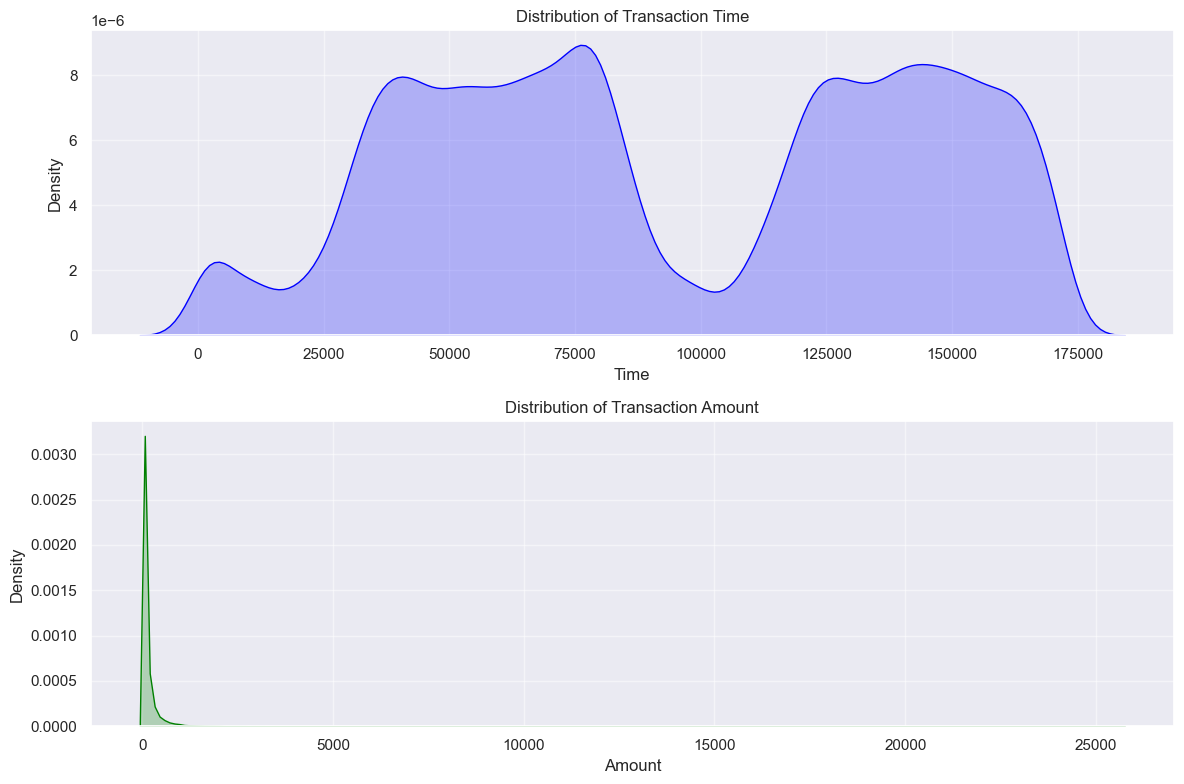

In [12]:
# Check the distribution of Time and Amount
plt.figure(figsize=(12, 8))

# Create a subplot for Time distribution
plt.subplot(2, 1, 1)
sns.kdeplot(df['Time'], shade=True, color='blue')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Density')
plt.grid(True, alpha=0.5)

# Create a subplot for Amount distribution
plt.subplot(2, 1, 2)
sns.kdeplot(df['Amount'], shade=True, color='green')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.grid(True, alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


# Preprocess Data - Bring Amount and Time to the similar scale 


In [13]:
# Apply scaling operation on the amount and time filed of the data.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time"] = scaler.fit_transform(df["Time"].values.reshape(-1, 1))

df.head()


Time    V1    V2   V3    V4    V5    V6    V7    V8    V9   V10   V11   V12   V13   V14   V15   V16   V17   V18   V19   V20   V21   V22   V23   V24   V25   V26   V27   V28  Amount  Class
0 -0.99 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  0.09 -0.55 -0.62 -0.99 -0.31  1.47 -0.47  0.21  0.03  0.40  0.25 -0.02  0.28 -0.11  0.07  0.13 -0.19  0.13 -0.02    1.78      0
1 -0.99  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26 -0.17  1.61  1.07  0.49 -0.14  0.64  0.46 -0.11 -0.18 -0.15 -0.07 -0.23 -0.64  0.10 -0.34  0.17  0.13 -0.01  0.01   -0.27      0
2 -0.99 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  0.21  0.62  0.07  0.72 -0.17  2.35 -2.89  1.11 -0.12 -2.26  0.52  0.25  0.77  0.91 -0.69 -0.33 -0.14 -0.06 -0.06    4.98      0
3 -0.99 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39 -0.05 -0.23  0.18  0.51 -0.29 -0.63 -1.06 -0.68  1.97 -1.23 -0.21 -0.11  0.01 -0.19 -1.18  0.65 -0.22  0.06  0.06    1.42      0
4 -0.99 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  0.75 -0.82  0.54  1.35 -1.12  0.18 -0.45 -0.24 -0.04  0.80  0.41 -0.01  0.80 -0.14  0.14 -0.21  0.50  0.22  0.22    0.67      0

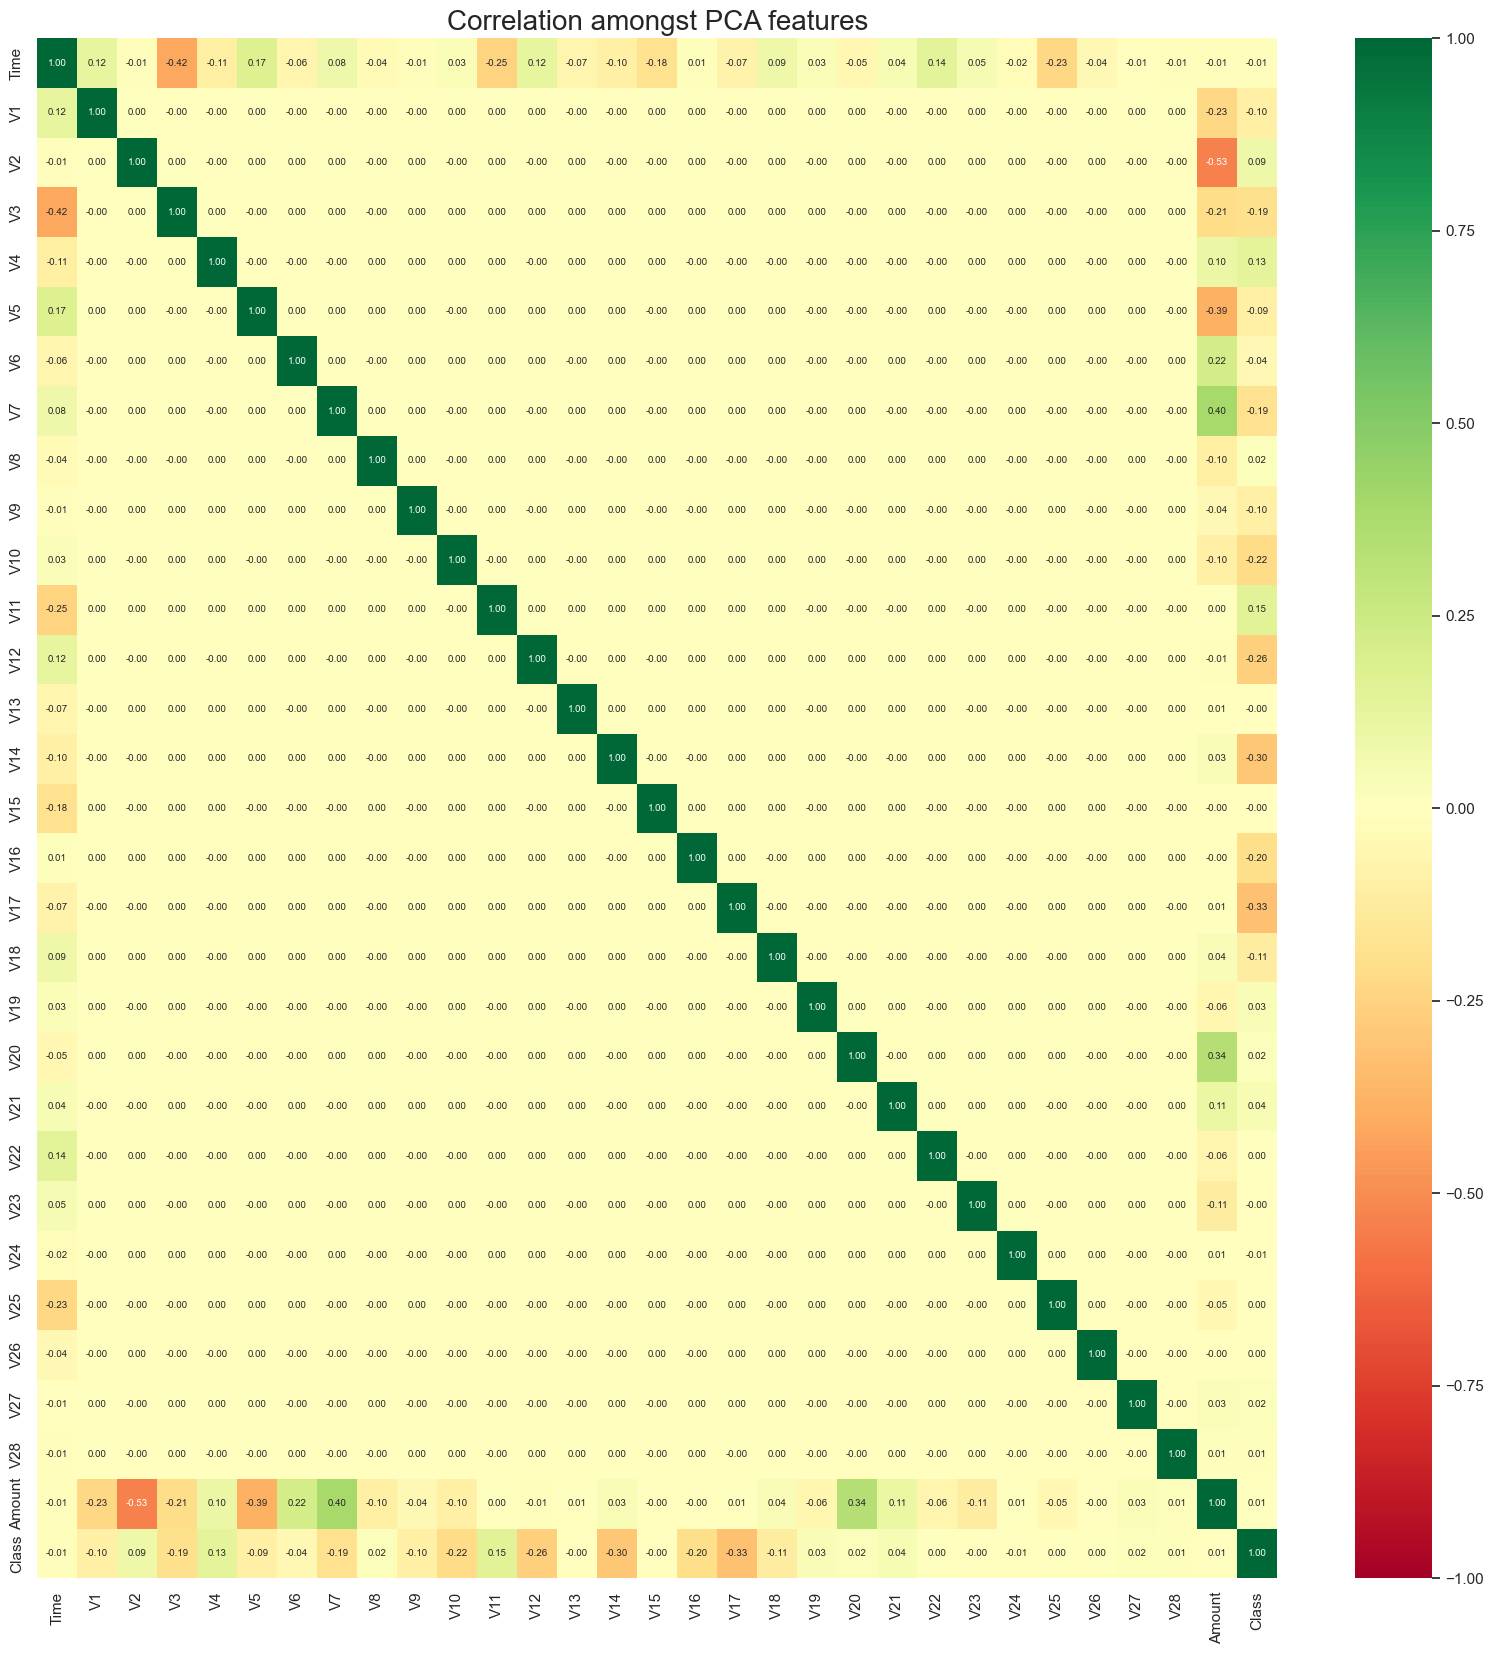

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1, fmt=".2f", annot_kws={"fontsize":7}) 
plt.title('Correlation amongst PCA features', fontsize=20) 
plt.show()

Observation: We want to identify which featues are playing most important part in identification of fraud transaction
<li> V4 is positively corelated with Class and Amount both 
<li> V1, V3, V5, V7, V9 , V10, V12, V14, V17, V18 and Class are negatively corelated 
<li> V2, V4, V11  and Class are positively corelated 

In [15]:
# Choosing the key positive and negative corelations
pos_corelation = ["V2", "V4", "V11", "V21"]
neg_corelation = ["V10", "V12", "V14", "V17"]
features = pos_corelation + neg_corelation

In [16]:
# Draw Outlier plot for above 8 variables using subplots 
def plot_corelation(df, corelations):
    plt.figure(figsize=(20, 5))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    k = 0
    for i in range(1):
        for j in range(4):
            plt.subplot(1, 4, k+1)
            sns.boxplot(x="Class", y=corelations[k], data=df)
            plt.title(corelations[k])
            k += 1

    plt.show()


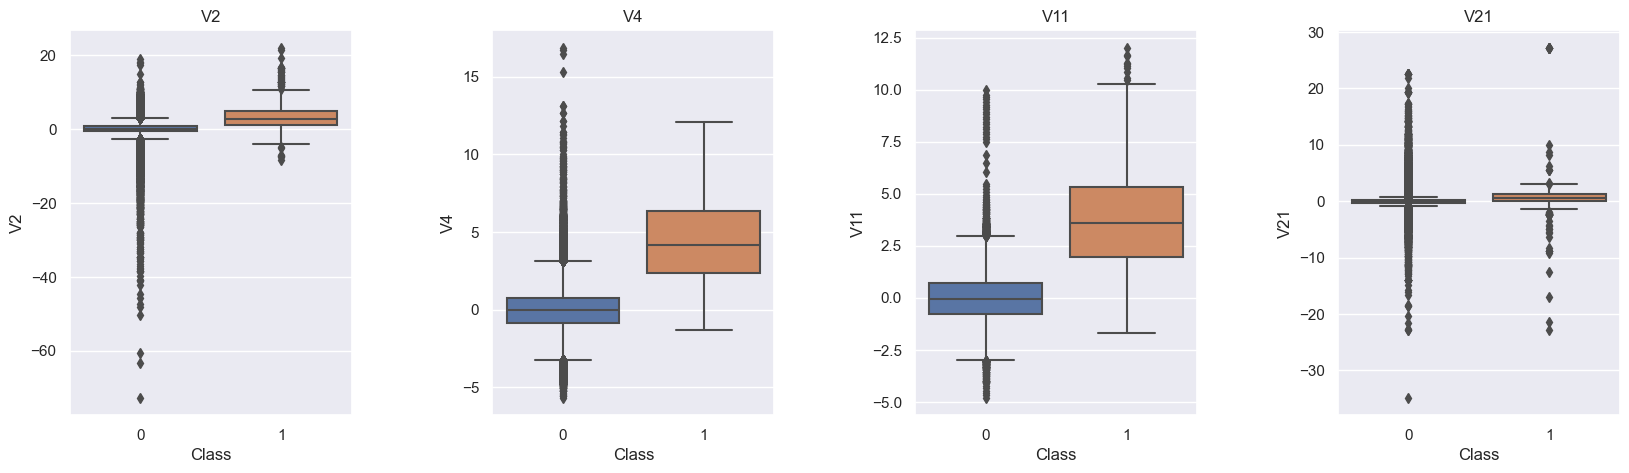

In [17]:
# Define box plot on positive corelated variables 
plot_corelation(df, pos_corelation)


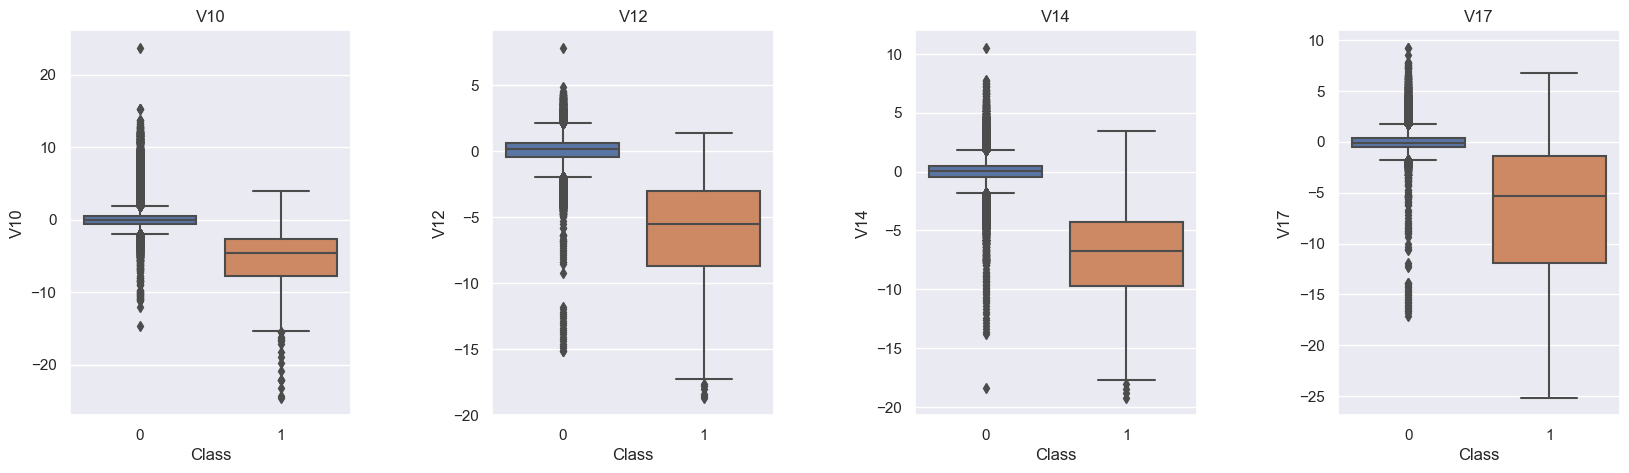

In [18]:
# Define box plot on negative corelated variables 
plot_corelation(df, neg_corelation)

# Each plot above shows some outliers in specific area; We will remove the outliers using IQR Range

In [19]:
# function to cleanup the outliers based on the IQR range 
def delete_outliers(df, features):
    df_stats = []  # Initialize df_stats as an empty list
    for col in features:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df_stats.append({"col": col, "q1": q1, "q3": q3, "iqr": iqr, "lower_bound": lower_bound, "upper_bound": upper_bound})
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    df_stats = pd.DataFrame(df_stats)  # Convert df_stats to a DataFrame
    return df, df_stats

In [20]:
df, stats = delete_outliers(df, features)
stats.head(10)

col    q1   q3  iqr  lower_bound  upper_bound
0   V2 -0.60 0.80 1.40        -2.70         2.91
1   V4 -0.84 0.72 1.56        -3.19         3.07
2  V11 -0.74 0.75 1.49        -2.98         2.99
3  V21 -0.23 0.17 0.40        -0.83         0.77
4  V10 -0.52 0.34 0.86        -1.82         1.64
5  V12 -0.37 0.61 0.99        -1.85         2.09
6  V14 -0.44 0.41 0.85        -1.70         1.68
7  V17 -0.52 0.30 0.82        -1.74         1.52

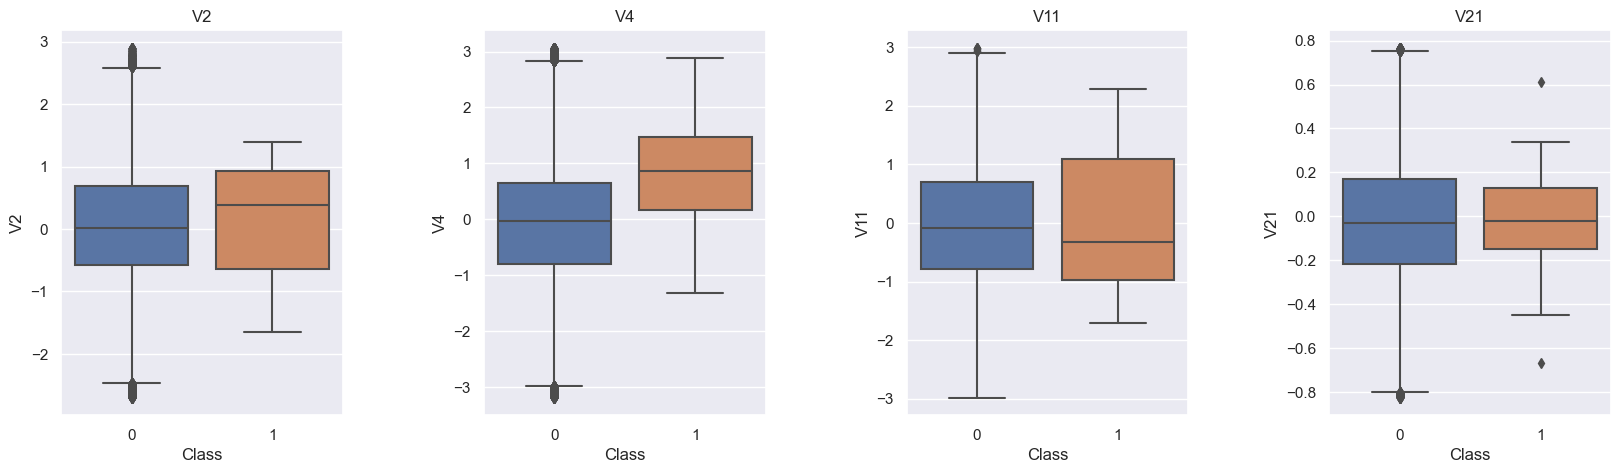

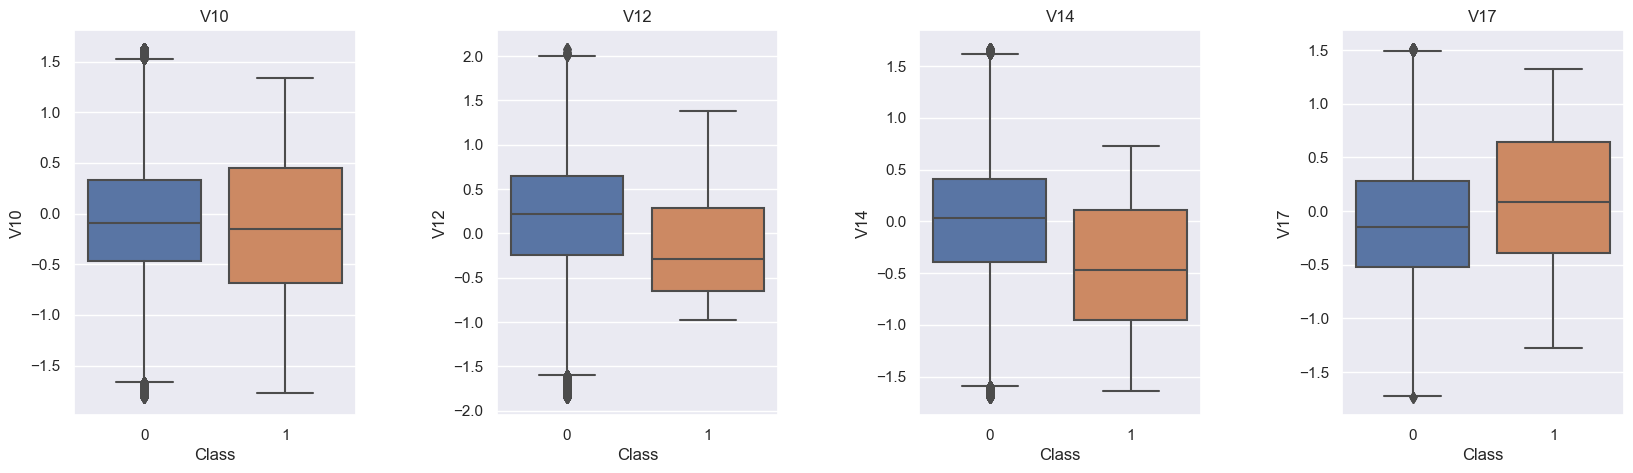

In [21]:
# Outlier have cleaned up now.
plot_corelation(df, pos_corelation)
plot_corelation(df, neg_corelation)

# Model Selection Preparation 

## We will try with following models
<li>Logistic Regression
<li>Random Forest
<li>KNN
<li>Gradient Descent
<li>Gradient Boosting
<li>Isolation Forest 
<li>SVM
<li>Deep Learning Model

## We will try following sampling technique given their is Class imbalance exists during Train - Test Split
<li> Stratified Sampling 
<li> Cross-Validation with Stratified Sampling 
<li> Repeated Random Sampling 
<li> Deep Learning Model

In [22]:


# Define a dictionary of models and their names 


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgb.XGBClassifier()
    }


model_results = {
    "Logistic Regression": {},
    "Random Forest": {},
    "KNN": {},
    "SVM": {},
    "Decision Tree": {},
    "XGBoost": {}
    }



### If my machine is powerful enough i would like to run the full grid search CV to identify the best parameter 
### However If I run this with all the above models, it takes 2-3 days minimum; So I will keep this block commented

RUN_GRID_SEARCH_CV = false

In [23]:
RUN_GRID_SEARCH_CV = False 
param_grids = {
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"],
    },
    "Random Forest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [None, 5, 10],
    },
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
    },
    "Decision Tree": {
        "max_depth": [None, 10, 20],
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.3],
        "max_depth": [3, 5, 7],
    },
    "Isolation Forest": {
        "n_estimators": [50, 100, 200],
        "contamination": [0.01, 0.05, 0.1],
    }
}

## Use Stratified K Fold

In [24]:
%time
# Use Stratified K Fold and run a regression model 
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

X = df.drop(['Class'], axis=1)
y = df['Class']

# Initiaize a data frame to record all observations

df_accuracy = pd.DataFrame(columns=['Model', 'accuracy', 'precision', 'recall', 'f1-score','roc-auc-score'])
accuracy_list = []  # Initialize df_stats as an empty list
for model_name, model in models.items():
    print(f"Running model {model_name}, {model}")
    
    #check if saved model file exists 

    if RUN_GRID_SEARCH_CV:  # Need powerful machines to run this in defined timeframe
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=skf, scoring='accuracy', verbose=True)
        grid_search.fit(X, y)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best params for {model_name} are: {best_params}")
    else:
        best_model = model


    accuracy_scores = cross_val_score(best_model, X, y, cv=skf, scoring="accuracy")
    cross_val_predictions = cross_val_predict(best_model, X, y, cv=skf)     
    
    precision = precision_score(y, cross_val_predictions)
    recall = recall_score(y, cross_val_predictions)
    f1 = f1_score(y, cross_val_predictions)
    accuracy = accuracy_score(y, cross_val_predictions)
    roc_auc = roc_auc_score(y, cross_val_predictions)

    print(f"Accuracy: {accuracy_scores.mean()}\r\nprecision: {precision}\r\nrecall: {recall}\r\nf1-score: {f1}\r\nroc-auc-score: {roc_auc}")

    accuracy_list.append({"Model" : model_name, 
                        "accuracy" : accuracy_scores.mean(), 
                        "precision" : precision,
                        "recall" : recall,
                        "f1-score" : f1,
                        "roc-auc-score" : roc_auc})
    print(f"Using Model {model_name}-stratified, we are getting \n {accuracy_list}")

df_accuracy = pd.DataFrame(accuracy_list)

df_accuracy


CPU times: total: 0 ns
Wall time: 0 ns
Running model Logistic Regression, LogisticRegression()
Accuracy: 0.9998818498881763
precision: 0.0
recall: 0.0
f1-score: 0.0
roc-auc-score: 0.5
Using Model Logistic Regression-stratified, we are getting 
 [{'Model': 'Logistic Regression', 'accuracy': 0.9998818498881763, 'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'roc-auc-score': 0.5}]
Running model Random Forest, RandomForestClassifier()
Accuracy: 0.9998818498881763
precision: 0.0
recall: 0.0
f1-score: 0.0
roc-auc-score: 0.5
Using Model Random Forest-stratified, we are getting 
 [{'Model': 'Logistic Regression', 'accuracy': 0.9998818498881763, 'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'roc-auc-score': 0.5}, {'Model': 'Random Forest', 'accuracy': 0.9998818498881763, 'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'roc-auc-score': 0.5}]
Running model KNN, KNeighborsClassifier()
Accuracy: 0.9998818498881763
precision: 0.0
recall: 0.0
f1-score: 0.0
roc-auc-score: 0.5
Using Model KNN-

Model  accuracy  precision  recall  f1-score  roc-auc-score
0  Logistic Regression      1.00       0.00    0.00      0.00           0.50
1        Random Forest      1.00       0.00    0.00      0.00           0.50
2                  KNN      1.00       0.00    0.00      0.00           0.50
3                  SVM      1.00       0.00    0.00      0.00           0.50
4        Decision Tree      1.00       0.00    0.00      0.00           0.50
5              XGBoost      1.00       0.00    0.00      0.00           0.50

A precision and recall score of 0 in a binary classification problem typically indicates that the model is making all predictions of one class (usually the majority class) and none of the other class. This can happen when the model's decision boundary is set in such a way that it's effectively classifying all instances as the negative class (or vice versa) and not predicting any instances of the positive class.

In [25]:
    X.shape, y.shape

((220059, 30), (220059,))

## Undersampling

In [26]:
%time
undersampler = RandomUnderSampler()
accuracy_list = []  # Initialize df_stats as an empty list
for model_name, model in models.items():
    print(f"Running model {model_name}")
    
    if os.path.exists(f"models/{model_name}-undersampler.pkl"):
        print(f"Loading model {model_name}")
        best_model = pickle.load(open(f"models/{model_name}-undersampler.pkl", "rb"))
    else:
        if RUN_GRID_SEARCH_CV:
            grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[model_name], cv=skf, scoring='accuracy', verbose=True)
            grid_search.fit(X, y)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            print(f"Best params for {model_name} are: {best_params}")
        else:
            best_model = model

        #pickle.dump(best_model, open(f"models/{model_name}-undersampler.pkl", "wb"))

    # Under sample the data 
    X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

    pipeline = Pipeline([ 
                        ('model', best_model) 
                        ])
    
    print(f"Using model : {best_model}")
    accuracy_scores = cross_val_score(best_model, X_undersampled, y_undersampled, cv=skf, scoring="accuracy")
    cross_val_predictions = cross_val_predict(best_model, X_undersampled, y_undersampled, cv=skf)
    precision = precision_score(y_undersampled, cross_val_predictions)
    recall = recall_score(y_undersampled, cross_val_predictions)
    f1 = f1_score(y_undersampled, cross_val_predictions)
    accuracy = accuracy_score(y_undersampled, cross_val_predictions)
    roc_auc = roc_auc_score(y_undersampled, cross_val_predictions)

    print(f"Accuracy: {accuracy_scores.mean()}\r\nprecision: {precision}\r\nrecall: {recall}\r\nf1-score: {f1}\r\nroc-auc-score: {roc_auc}")
    
    accuracy_list.append({"Model" : f"{model_name}-undersampler", 
                    "accuracy" : accuracy_scores.mean(), 
                    "precision" : precision,
                    "recall" : recall,
                    "f1-score" : f1,
                    "roc-auc-score" : roc_auc})

    print(f"Using Model {model_name}-undersampler, we are getting \n {accuracy_list}")

df_temp = pd.DataFrame(accuracy_list)

df_accuracy = pd.concat([df_accuracy, df_temp])


CPU times: total: 0 ns
Wall time: 0 ns
Running model Logistic Regression
Using model : LogisticRegression()
Accuracy: 0.7527272727272727
precision: 0.76
recall: 0.7307692307692307
f1-score: 0.7450980392156863
roc-auc-score: 0.75
Using Model Logistic Regression-undersampler, we are getting 
 [{'Model': 'Logistic Regression-undersampler', 'accuracy': 0.7527272727272727, 'precision': 0.76, 'recall': 0.7307692307692307, 'f1-score': 0.7450980392156863, 'roc-auc-score': 0.75}]
Running model Random Forest
Using model : RandomForestClassifier()
Accuracy: 0.650909090909091
precision: 0.5666666666666667
recall: 0.6538461538461539
f1-score: 0.6071428571428571
roc-auc-score: 0.5769230769230769
Using Model Random Forest-undersampler, we are getting 
 [{'Model': 'Logistic Regression-undersampler', 'accuracy': 0.7527272727272727, 'precision': 0.76, 'recall': 0.7307692307692307, 'f1-score': 0.7450980392156863, 'roc-auc-score': 0.75}, {'Model': 'Random Forest-undersampler', 'accuracy': 0.65090909090909

## Oversampling

In [27]:
%time
# Import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import pickle

# Create a SMOTE instance
sm = SMOTE(sampling_strategy='minority', random_state=2)

accuracy_list = []  # Initialize accuracy_list as an empty list

# Apply oversampling to the entire dataset
X_oversampled, y_oversampled = sm.fit_resample(X, y)

for model_name, model in models.items():
    print(f"Running model {model_name}")

    if os.path.exists(f"models/{model_name}-oversampler.pkl"):
        print(f"Loading model {model_name}")
        best_model = pickle.load(open(f"models/{model_name}-oversampler.pkl", "rb"))
    else:  
        if RUN_GRID_SEARCH_CV:  
            grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[model_name], cv=skf, scoring='accuracy', verbose=True)
            grid_search.fit(X, y)
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
            print(f"Best params for {model_name} are: {best_params}")
        else:
            best_model = model

        # pickle.dump(best_model, open(f"models/{model_name}-oversampler.pkl", 'wb'))

    pipeline = Pipeline([ 
        ('model', best_model) 
    ])

    print(f"Using model : {best_model}")
    accuracy_scores = cross_val_score(pipeline, X_oversampled, y_oversampled, cv=skf, scoring="accuracy")
    cross_val_predictions = cross_val_predict(pipeline, X_oversampled, y_oversampled, cv=skf)
    precision = precision_score(y_oversampled, cross_val_predictions)
    recall = recall_score(y_oversampled, cross_val_predictions)
    f1 = f1_score(y_oversampled, cross_val_predictions)
    accuracy = accuracy_score(y_oversampled, cross_val_predictions)
    roc_auc = roc_auc_score(y_oversampled, cross_val_predictions)
    
    print(f"Accuracy: {accuracy_scores.mean()}\r\nprecision: {precision}\r\nrecall: {recall}\r\nf1-score: {f1}\r\nroc-auc-score: {roc_auc}")

    accuracy_list.append({"Model" : f"{model_name}-oversampler", 
                    "accuracy" : accuracy_scores.mean(), 
                    "precision" : precision,
                    "recall" : recall,
                    "f1-score" : f1,
                    "roc-auc-score" : roc_auc})    
    
    print(f"Using Model {model_name}-oversampler, we are getting \n {accuracy_list}")

df_temp = pd.DataFrame(accuracy_list)

df_accuracy = pd.concat([df_accuracy, df_temp])


CPU times: total: 0 ns
Wall time: 0 ns
Running model Logistic Regression
Using model : LogisticRegression()
Accuracy: 0.9026691509312501
precision: 0.8905807100064802
recall: 0.9181440965673331
f1-score: 0.9041523823163473
roc-auc-score: 0.9026691450827831
Using Model Logistic Regression-oversampler, we are getting 
 [{'Model': 'Logistic Regression-oversampler', 'accuracy': 0.9026691509312501, 'precision': 0.8905807100064802, 'recall': 0.9181440965673331, 'f1-score': 0.9041523823163473, 'roc-auc-score': 0.9026691450827831}]
Running model Random Forest
Using model : RandomForestClassifier()
Accuracy: 0.999993182851083
precision: 0.9999909104956507
recall: 0.9999954552271705
f1-score: 0.9999931828562469
roc-auc-score: 0.9999931828407557
Using Model Random Forest-oversampler, we are getting 
 [{'Model': 'Logistic Regression-oversampler', 'accuracy': 0.9026691509312501, 'precision': 0.8905807100064802, 'recall': 0.9181440965673331, 'f1-score': 0.9041523823163473, 'roc-auc-score': 0.9026691

In [ ]:
# Look at the various data 
df_accuracy.head()

## Deep Learning Model   

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.losses as losses
import tensorflow.keras.metrics as metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

accuracy_list = []  # Initialize df_stats as an empty list

results = cross_val_score(model, X, y, cv=skf, scoring = 'accuracy')

cross_val_predictions = cross_val_predict(model, X, y, cv=skf)

precision = precision_score(y, cross_val_predictions)
recall = recall_score(y, cross_val_predictions)
f1 = f1_score(y, cross_val_predictions)
accuracy = accuracy_score(y, cross_val_predictions)
roc_auc = roc_auc_score(y, cross_val_predictions)

accuracy_list.append({"Model" : "Neural Network", 
                "accuracy" : accuracy_scores.mean(), 
                "precision" : precision,
                "recall" : recall,
                "f1-score" : f1,
                "roc-auc-score" : roc_auc})    



df_temp = pd.DataFrame(accuracy_list)
df_accuracy = pd.concat([df_accuracy, df_temp])

# Pickle and save the model to a file
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'model.pickle'")

# Evaluation

In [ ]:
df_accuracy.to_csv("accuracy_score.csv")

# Final Inference